# Lending club case study

In [486]:
# Importing Packages: All required packages are imported.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored


In [487]:
# Importing Dataset
lccs_dataframe = pd.read_csv('loan.csv')

### Panda Configuration

In [488]:
 # to display all the columns
pd.set_option('display.max_columns', 111)
# to display all rows of df series
pd.set_option('display.max_rows',150) 
pd.options.display.float_format = '{:.4f}'.format

In [489]:
#Undestanding the shape and data types
print("Shape -> "+str(lccs_dataframe.shape))

Shape -> (39717, 111)


## 1. Data Cleaning

### Missing data

`Fininding Null value`

In [490]:
columns_nullcount = lccs_dataframe.isnull().sum()

## Making percentage of columns missing value

# funcion to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [491]:
#Columns with null count more then 50% its found to be more data loss(missing)

colums_missing_percentage =  column_wise_null_percentage(lccs_dataframe)

col_with_50_per_missing =colums_missing_percentage[colums_missing_percentage>50]
print("Total Columns with 50% missing value", col_with_50_per_missing.size)
print(col_with_50_per_missing.head())
print(".....more")

Total Columns with 50% missing value 57
mths_since_last_delinq         64.6600
mths_since_last_record         92.9900
next_pymnt_d                   97.1300
mths_since_last_major_derog   100.0000
annual_inc_joint              100.0000
dtype: float64
.....more


In [492]:
#Droping 50% data missing columns with index
lccs_dataframe = lccs_dataframe.drop(col_with_50_per_missing.index,axis=1)
print("After deleting")
print("Shape -> "+str(lccs_dataframe.shape))

After deleting
Shape -> (39717, 54)


In [493]:
#For analysis considering only columns with less the 15% data loss (considering its a fare trade)

col_with_l15_per_missing =colums_missing_percentage[colums_missing_percentage<15]
print("Total Columns with less 15% missing value", col_with_l15_per_missing.size)
print(col_with_l15_per_missing.head())
print(".....more")

## Data type correction for intrest rate and emp_length
lccs_dataframe['int_rate'] = lccs_dataframe['int_rate'].apply(lambda ir : float(ir.replace('%','')))
## Applying for months
lccs_dataframe['term'] = lccs_dataframe['term'].apply(lambda ir : int(ir.replace(' months','')))


Total Columns with less 15% missing value 53
id                0.0000
member_id         0.0000
loan_amnt         0.0000
funded_amnt       0.0000
funded_amnt_inv   0.0000
dtype: float64
.....more


In [494]:
lccs_dataframe[col_with_l15_per_missing.index].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39661.0000,39717.0000,39717.0000,39661.0000,39717.0000,39020.0000,39678.0000
mean,683131.9131,850463.5594,11219.4438,10947.7132,10397.4489,42.4180,12.0212,324.5619,68968.9264,13.3151,0.1465,0.8692,9.2944,0.0551,13382.5281,22.0888,51.2279,50.9898,12153.5965,11567.1491,9793.3488,2263.6632,1.3630,95.2216,12.4061,2678.8262,0.0000,1.0000,0.0000,0.0000,0.0000,0.0433,0.0000
std,210694.1329,265678.3074,7456.6707,7187.2387,7128.4504,10.6228,3.7248,208.8749,63793.7658,6.6786,0.4918,1.0702,4.4003,0.2372,15885.0166,11.4017,375.1728,373.8245,9042.0408,8942.6726,7065.5221,2608.1120,7.2900,688.7448,148.6716,4447.1360,0.0000,0.0000,0.0000,0.0000,0.0000,0.2043,0.0000
min,54734.0000,70699.0000,500.0000,500.0000,0.0000,36.0000,5.4200,15.6900,4000.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,516221.0000,666780.0000,5500.0000,5400.0000,5000.0000,36.0000,9.2500,167.0200,40404.0000,8.1700,0.0000,0.0000,6.0000,0.0000,3703.0000,13.0000,0.0000,0.0000,5576.9300,5112.3100,4600.0000,662.1800,0.0000,0.0000,0.0000,218.6800,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,665665.0000,850812.0000,10000.0000,9600.0000,8975.0000,36.0000,11.8600,280.2200,59000.0000,13.4000,0.0000,1.0000,9.0000,0.0000,8850.0000,20.0000,0.0000,0.0000,9899.6403,9287.1500,8000.0000,1348.9100,0.0000,0.0000,0.0000,546.1400,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,837755.0000,1047339.0000,15000.0000,15000.0000,14400.0000,60.0000,14.5900,430.7800,82300.0000,18.6000,0.0000,1.0000,12.0000,0.0000,17058.0000,29.0000,0.0000,0.0000,16534.4330,15798.8100,13653.2600,2833.4000,0.0000,0.0000,0.0000,3293.1600,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1077501.0000,1314167.0000,35000.0000,35000.0000,35000.0000,60.0000,24.5900,1305.1900,6000000.0000,29.9900,11.0000,8.0000,44.0000,4.0000,149588.0000,90.0000,6311.4700,6307.3700,58563.6799,58563.6800,35000.0200,23563.6800,180.2000,29623.3500,7002.1900,36115.2000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0000


In [495]:
# identify unique values count

lccs_dataframe[col_with_l15_per_missing.index].nunique().sort_values(ascending=False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
last_credit_pull_d              106
last_pymnt_d                

In [496]:
# From above we can consider 
# grade
# emp_length   
# home_ownership  
# loan_status                       

In [497]:
# Deleting ID column
lccs_dataframe = lccs_dataframe.drop(['id','member_id','url'],axis=1)

In [498]:
print(lccs_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  int64  
 4   int_rate                    39717 non-null  float64
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

## 2. Extracting different data type

#### Univariate Analysis
This session focuses on analyzing variables one at a time, as the term “uni-variate” implies. Before analyzing numerous variables together, it’s critical to first analyze each one individually.

#### Continuous Variables
When dealing with continuous variables, it’s important to know the variable’s central tendency and spread. Statistical metrics visualization methods such as Box-plot, Histogram/Distribution Plot, Violin Plot, and others are used to measure these.

#### Categorical Variables
We’ll utilize a frequency table to study the distribution of categorical variables. Count and Count percent against each category are two metrics that can be used to assess it. As a visualization, a count-plot or a bar chart can be employed.

In [499]:
# make list of numerical variables
numeric_variables = [var for var in lccs_dataframe.columns if lccs_dataframe[var].dtypes != 'O']
print('Number of numerical variables: ', len(numeric_variables))

# visualise the numerical variables
lccs_dataframe[numeric_variables].head()


#  let's male a list of discrete variables
discrete_vars = [var for var in numeric_variables if len(
    lccs_dataframe[var].unique()) < 20]

print('Number of discrete variables: ', len(discrete_vars))

Number of numerical variables:  31
Number of discrete variables:  11


In [500]:
# Converting emp year of experiance removing the symbols and extracting numbers only. 

def extractnumber(emp_length):
       if '<' in emp_length:
        return '0'
       elif '+' in emp_length:
        return emp_length.split('+')[0]
       else:
        return emp_length.split()[0]

lccs_dataframe['emp_length'].fillna(lccs_dataframe['emp_length'].mode()[0], inplace=True)      
lccs_dataframe["emp_length"] = lccs_dataframe["emp_length"].astype(str)
lccs_dataframe["emp_length"] = lccs_dataframe["emp_length"].apply(extractnumber)
lccs_dataframe["emp_length"] = pd.to_numeric(lccs_dataframe["emp_length"])

In [501]:
# Lisiting out available loan status.
print("Loan Status")
lccs_dataframe['loan_status'].unique()

Loan Status


array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### Removing the loan in-progress

In [502]:
lccs_dataframe = lccs_dataframe[lccs_dataframe['loan_status'] != 'Current']

#### Finding Categorical variable

In [503]:
# capture categorical variables in a list
categorical_vars = [var for var in lccs_dataframe.columns if lccs_dataframe[var].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_vars))
categorical_vars

Number of categorical variables:  19


['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

#### Countineous variable 

In [504]:
# make list of continuous variables
continuous_vars = [
    var for var in numeric_variables if var not in discrete_vars]
print('Number of continuous variables: ', len(continuous_vars))

Number of continuous variables:  20


In [505]:
continuous_vars

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt']

In [506]:
#Finding Outliers

In [507]:
numeric_variables

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [508]:
# identify unique values in the colums having <15% null value 
col_with_l15_per_missing=col_with_l15_per_missing.drop(['id','member_id','url'])
lccs_dataframe[col_with_l15_per_missing.index].nunique().sort_values(ascending=False)

total_pymnt                   36714
total_pymnt_inv               36387
last_pymnt_amnt               34418
total_rec_int                 34025
emp_title                     28027
revol_bal                     21275
title                         19297
installment                   15022
funded_amnt_inv                8050
total_rec_prncp                6841
annual_inc                     5215
recoveries                     4040
dti                            2853
collection_recovery_fee        2616
total_rec_late_fee             1320
revol_util                     1088
funded_amnt                    1019
loan_amnt                       870
zip_code                        822
earliest_cr_line                524
int_rate                        370
last_credit_pull_d              106
last_pymnt_d                    101
total_acc                        82
issue_d                          55
addr_state                       50
open_acc                         40
sub_grade                   

## 3. Univariate Analysis

#### 3.a Univariate analysis

Categorical Univariate Analysis finding customers with no payment difficulties

In [509]:
# Dividing the variable into 2 for better analysis  ## 'Fully Paid', 'Charged Off'

defaulters=lccs_dataframe.loc[lccs_dataframe["loan_status"]=='Charged Off']
good_customers=lccs_dataframe.loc[lccs_dataframe["loan_status"]=='Fully Paid']

#Removing the outliers


lccs_dataframe = lccs_dataframe[lccs_dataframe['annual_inc']<500000]


In [510]:

percentage_defaulters= round(100*len(defaulters)/(len(good_customers)+len(defaulters)),2)

percentage_nondefaulters=round(100*len(good_customers)/(len(good_customers)+len(defaulters)),2)

print('Count of target0_df:', len(good_customers))
print('Count of target1_df:', len(defaulters))


print('Percentage of people who paid their loan are: ', percentage_nondefaulters, '%' )
print('Percentage of people who did not paid their loan are: ', percentage_defaulters, '%' )

Count of target0_df: 32950
Count of target1_df: 5627
Percentage of people who paid their loan are:  85.41 %
Percentage of people who did not paid their loan are:  14.59 %


#### Analysis

We have good amount of customers who paid loan.

In [511]:
# Categoroical Univariate Analysis in logarithmic scale


bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

lccs_dataframe['annual_inc_group']=pd.cut(lccs_dataframe ['annual_inc'],bins,labels=slot)

lccs_dataframe['open_acc_groups'] = pd.cut(lccs_dataframe['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

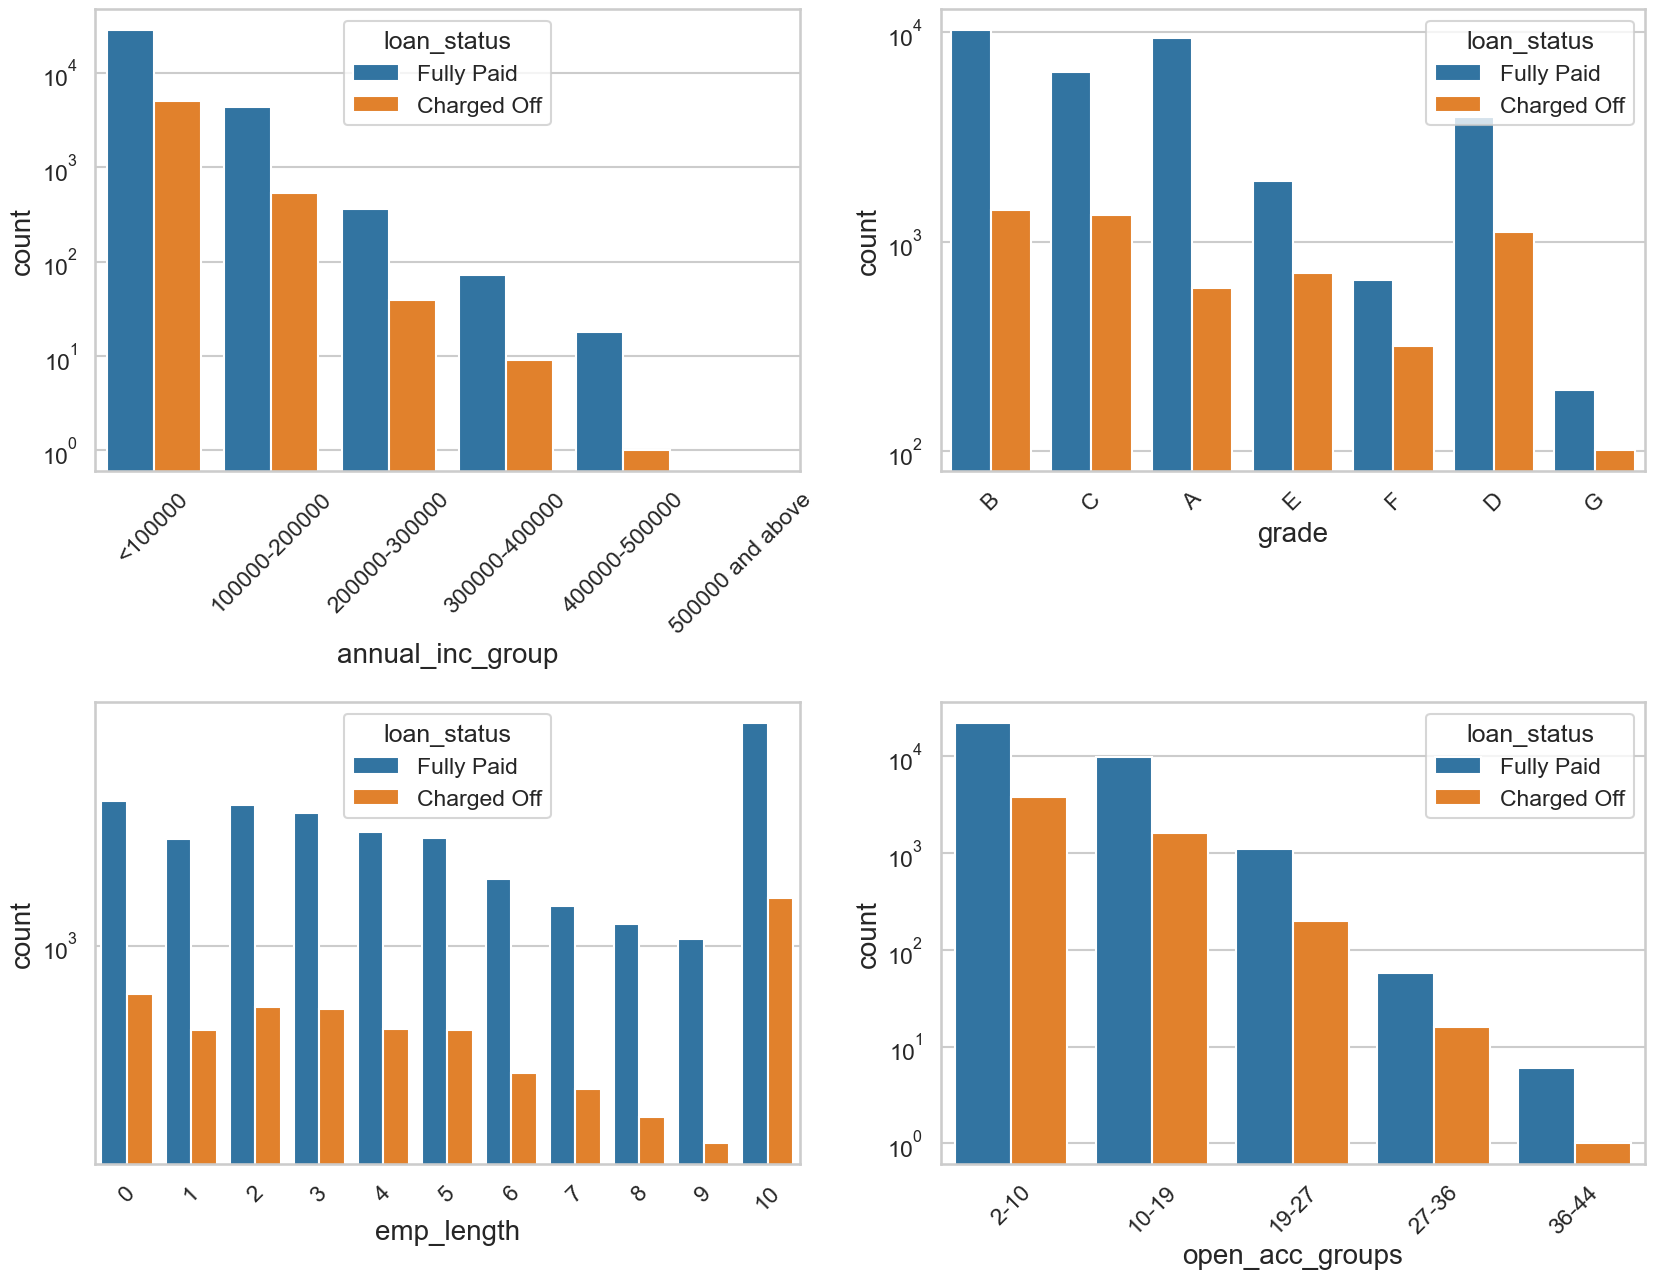

In [512]:

features = ['annual_inc_group','grade','emp_length','open_acc_groups']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue='loan_status', data = lccs_dataframe)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

#### Based on the above comparison 


Found that People with `Grade A` and annual salary between `('400000-500000')` and employment of `9 years` are good to provide loan they generally pay loan properly

#### Should be careful with people on grade D

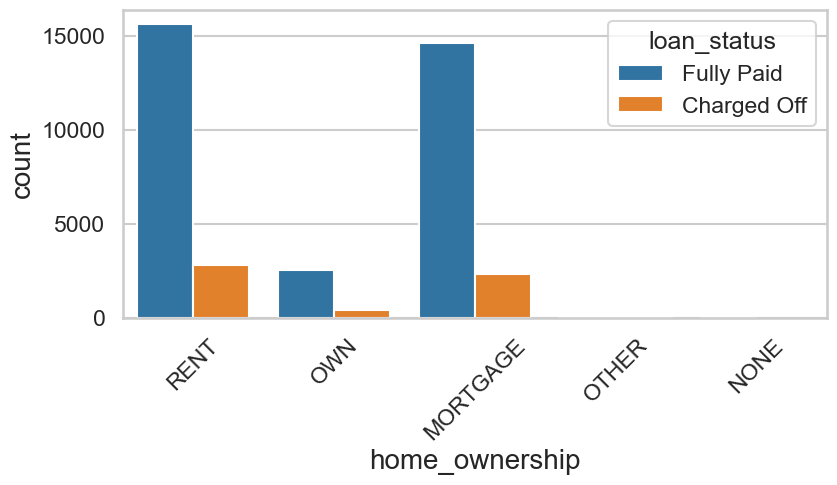

In [513]:
# Categoroical Univariate Analysis in Value scale

features = ['home_ownership']
plt.figure(figsize = (20, 10))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue='loan_status', data = lccs_dataframe)
     
    plt.rcParams['axes.titlesize'] = 16
    plt.xticks(rotation = 45)
#     plt.yscale('log')

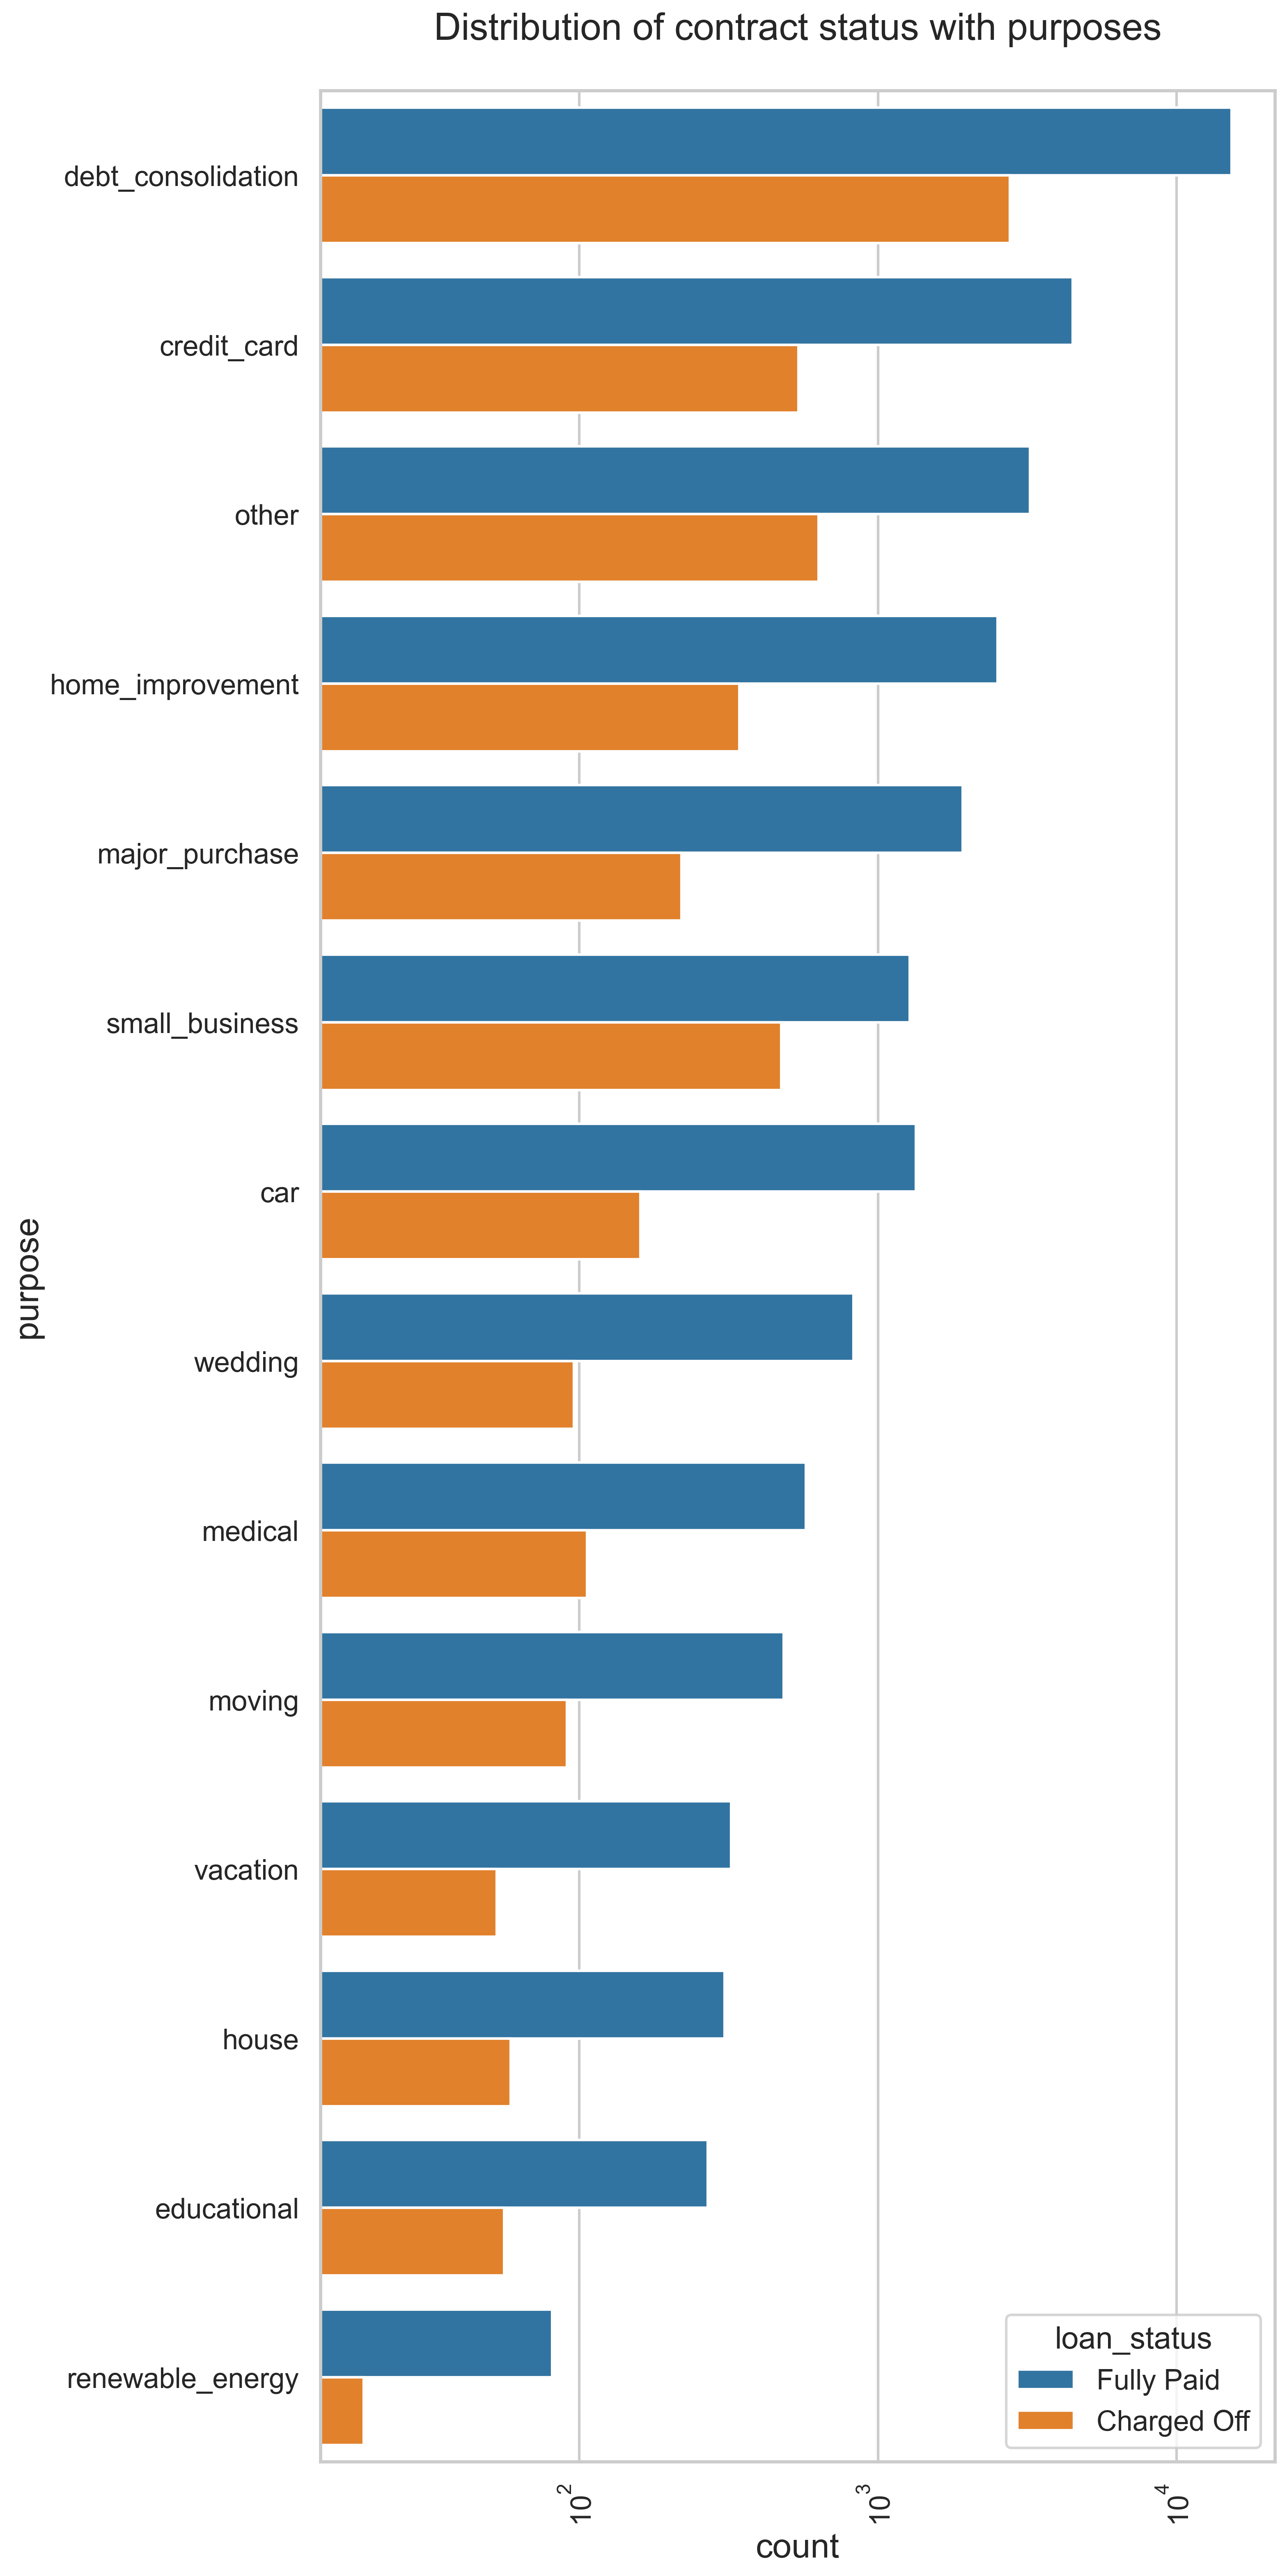

In [514]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,25),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = lccs_dataframe, y= 'purpose', 
                   order=lccs_dataframe['purpose'].value_counts().index,hue = 'loan_status')
plt.show()

#### Based on purpose

Education, Renewable Energy, House,and vacation are repaid properly

#### Based Home ownership

Found that people owning own house generally pays loan properly 

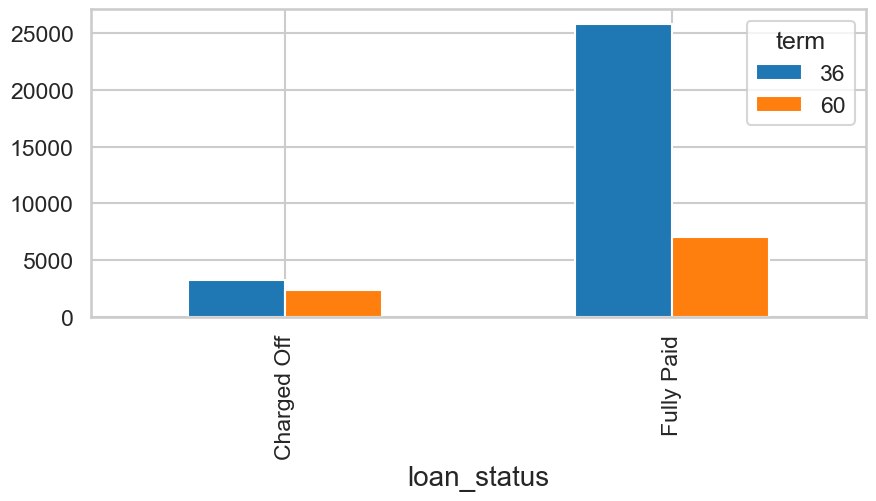

In [515]:
term_cross = pd.crosstab(columns=lccs_dataframe["term"],index=lccs_dataframe["loan_status"])
term_cross.plot(kind="bar", 
                 figsize=(10,4),
                 stacked=False )
plt.show()



#### People with more term pay it properly

### 4. Bivariate analysis for numerical variables

#### Trying to analyse the data with Correlation

Finding top 10 corelation varibales for good customers.

In [516]:
corr = good_customers.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
print("----------Corelation for Good customers--------------")
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

----------Corelation for Good customers--------------


,Var1,Var2,Correlation
609,total_rec_prncp,funded_amnt,1.0000
32,funded_amnt,loan_amnt,0.9800
545,total_pymnt,funded_amnt,0.9800
625,total_rec_prncp,total_pymnt,0.9800
608,total_rec_prncp,loan_amnt,0.9800
578,total_pymnt_inv,funded_amnt_inv,0.9800
544,total_pymnt,loan_amnt,0.9700
593,total_pymnt_inv,total_pymnt,0.9700
161,installment,funded_amnt,0.9600
610,total_rec_prncp,funded_amnt_inv,0.9600


In [517]:
lccs_dataframe.groupby('loan_status')


In [518]:
pivot = np.round(pd.pivot_table(lccs_dataframe,values=['annual_inc'],
                                index=['home_ownership'], 
                                columns=['loan_status'], 
                                aggfunc={'annual_inc':'mean'},
                                fill_value=0),2)
pivot

annual_inc           
loan_status    Charged Off Fully Paid
home_ownership                       
MORTGAGE        73112.6600 81848.1900
NONE                0.0000 80733.3300
OTHER           63433.0600 66412.1100
OWN             52672.5500 58817.3500
RENT            52712.7400 57032.6600

#### The above table illustarate the average salary to be considered to approve the loan, Column Fully Paid in the above table is the good option to go through.

In [519]:

lccs_dataframe['int_rate_group'] = pd.cut(lccs_dataframe['int_rate'], bins=5,precision =0,labels=['5%-10%','9%-13%','13%-17%','17%-21%','21%-24%'])

pivot = np.round(pd.pivot_table(lccs_dataframe,values=['annual_inc'],
                                index=['loan_status'], 
                                columns=['int_rate_group'], 
                                aggfunc={'loan_status':'count'},
                                fill_value=0),2)
pivot




loan_status                               
int_rate_group      5%-10% 9%-13% 13%-17% 17%-21% 21%-24%
loan_status                                              
Charged Off            589   1828    2011     974     214
Fully Paid            9241  12294    8665    2374     316

#### Intrest rate at `12%-24%` are defaulters at high range

In [520]:


term_cross = pd.crosstab(index=lccs_dataframe[lccs_dataframe['loan_status']=='Charged Off']['home_ownership'], 
                          columns=lccs_dataframe['purpose'])

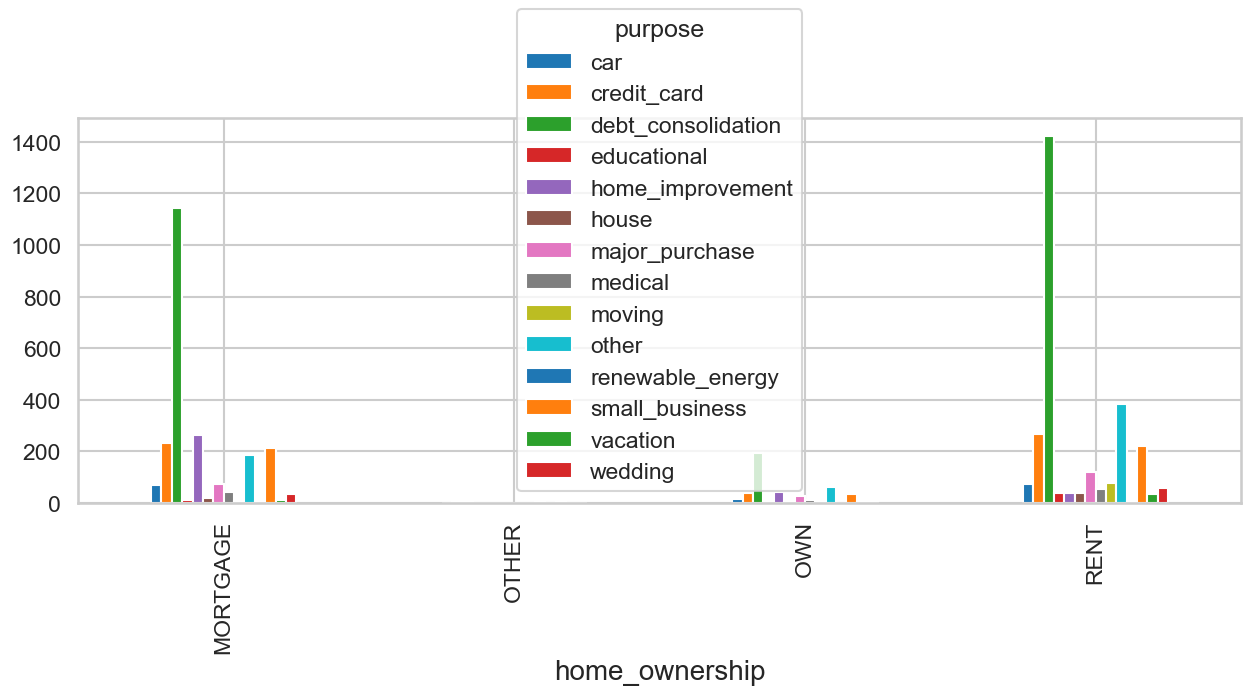

In [521]:
term_cross.plot(kind="bar", 
                 figsize=(15,5),
                 stacked=False)
plt.show()

# Summary

### 1. Recomendations

##### 1. Will consider the salary based on the house type

- MORTGAGE greater 80000
- OWN greater 50000
- RENT greater then 50000

##### 2. Based on the above comparison 

Found that People with any grade and annual salary between `('400000-500000')` and employment of `9 years` are good to provide loan they generally pay loan properly

###### Note : Should be careful with people on grade D

##### 3. High term of tenure is helping people to repayment of any salary group

##### 4. Employee above 10+ years of experience are defaulters most probably 

##### 5. Higher the interest rate more the 20% are making less repayment

##### 6. Debt Consolidation are the most defaulted.